In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [32]:
df = pd.read_csv("/Users/maurits/Documents/Ironhack/week_05/lab19/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [33]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [34]:
df.shape

(2443651, 9)

In [35]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [36]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [37]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

1. Generate a frequency table for the product category.
2. Which are the top 5 most listed product categories?

In [39]:
# Generating frequency table
frequency_table = df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [40]:
# Top 5 categories
proportion_table_top5 = df['category'].value_counts(normalize=True).iloc[:5]
proportion_table_top5

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

Visualizations:

1. Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
2. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_66559/3769025853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_top5.index, y=frequency_table_top5.values, palette="viridis");


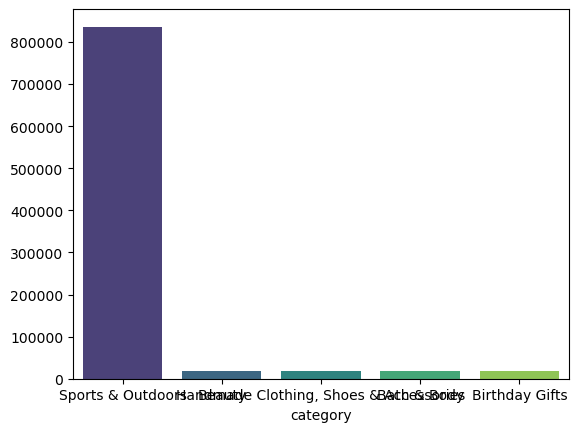

In [42]:
frequency_table_top5 = df['category'].value_counts().iloc[:5]
sns.barplot(x=frequency_table_top5.index, y=frequency_table_top5.values, palette="viridis");

<Axes: ylabel='count'>

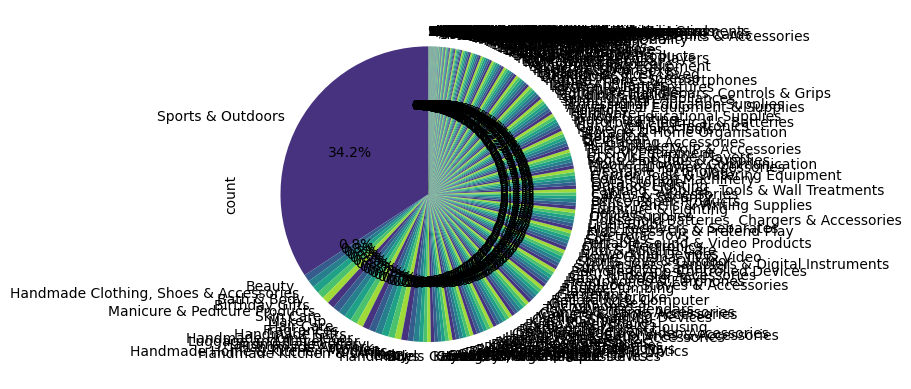

In [43]:
df_top5 = df.iloc[:5]
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [45]:
price_mean = df['price'].mean().round(2)
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

print(f"Mean is: {price_mean}")
print(f"Median is: {price_median}")
print(f"Mode is: {price_mode}")

Mean is: 89.24
Median is: 19.09
Mode is: 9.99


In [46]:
# Average price point it at 89.24 dollars, while the mode is at 9.99. This implies that the majority of the products have a higher price than 9.99.

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [48]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print("Variance is: ", variance_price)
print("Std dev is: ", std_dev_price)
print("Min price is: ", min_price)
print("Max price is: ", max_price)
print("Price range is: ", range_price)
print("Interquartiles are: ", quantiles_price)

Variance is:  119445.4853225653
Std dev is:  345.6088617535223
Min price is:  0.0
Max price is:  100000.0
Price range is:  100000.0
Interquartiles are:  0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [50]:
df['price']

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2443651, dtype: float64

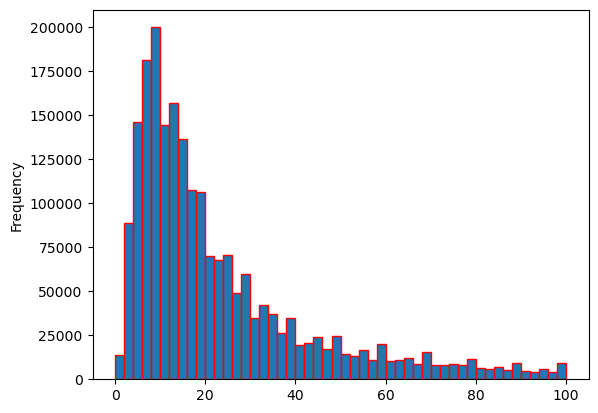

In [88]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot the histogram
filtered_df['price'].plot(kind='hist', bins=50, edgecolor='red')

import matplotlib.pyplot as plt
plt.show()


Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: ylabel='price'>

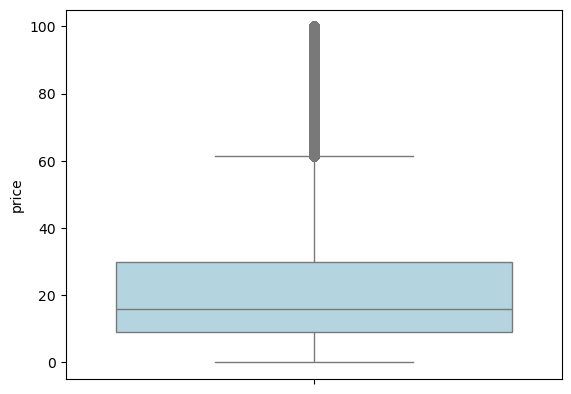

In [94]:
sns.boxplot(data = filtered_df['price'], color="lightblue")

In [54]:
price_mean = df['price'].mean().round(2)
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [96]:
stars_mean = df['stars'].mean().round(2)
stars_median = df['stars'].median()
stars_mode = df['stars'].mode()[0]

In [100]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print("Variance is: ", variance_stars)
print("Std dev is: ", std_dev_stars)
print("Min price is: ", min_stars)
print("Max price is: ", max_stars)
print("Price range is: ", range_stars)
print("Interquartiles are: ", quantiles_stars)

Variance is:  4.81743402976196
Std dev is:  2.1948653785054697
Min price is:  0.0
Max price is:  5.0
Price range is:  5.0
Interquartiles are:  0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


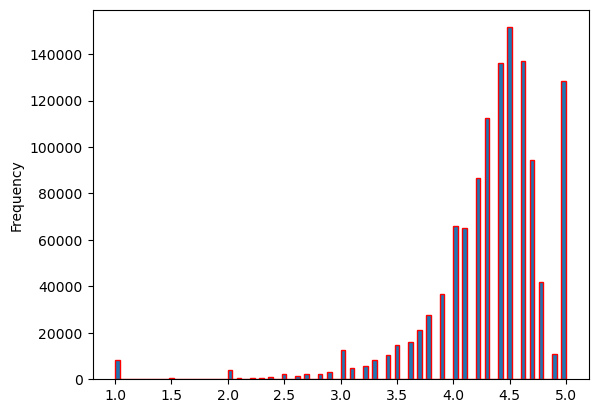

In [118]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define lower and upper bounds for outliers
# lower_bound = Q1 - 1.5
# upper_bound = Q3 + 1.5

# Filter out the outliers
filtered_df1 = df[(df['stars'] >= 0.1) & (df['stars'] <= 5.1)]

# Plot the histogram
filtered_df1['stars'].plot(kind='hist', bins=100, edgecolor='red')

import matplotlib.pyplot as plt
plt.show()


In [121]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)